In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#  Loading the dataset
data=pd.read_csv('seattleWeather_1948-2017.csv')

In [3]:
#  Preview the information of first 5 weather conditions
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
# Preview the information of last 5 weather conditions
data.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [5]:
#  Check the name of all columns available in dataset
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [6]:
# Statistical information of dataset
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Finding and treating null values

In [7]:
# Finding null values
data.isnull().sum(axis=0)

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [8]:
# Finding rows having null values in the 'PRCP' columns 
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [9]:
# Finding rows having null values in the 'RAIN' columns 
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<Axes: xlabel='RAIN', ylabel='count'>

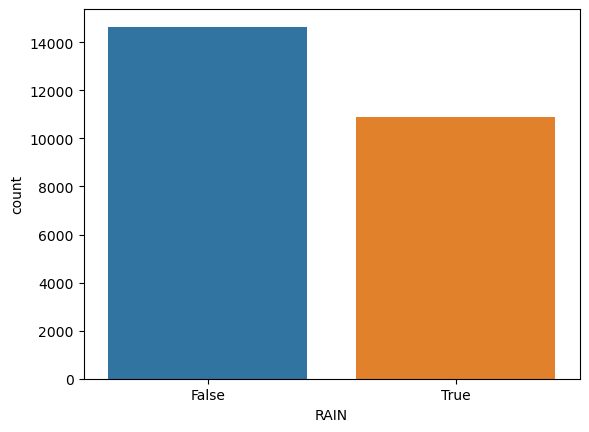

In [10]:
# Plot graph to determine the chances of rain
sns.countplot(data=data, x='RAIN')

 We can see from the figure above that there are less chances of rain. So, in the missing information, we can just insert "False"

In [11]:
#  Replacing null values in RAIN column with False
data['RAIN']=data['RAIN'].fillna('False')

In [12]:
# Checking if any null values present
data['RAIN'].isnull().sum()

0

In [13]:
# It is safer to insert a mean value in the PRCP column instead of dropping one row
data['PRCP'].mean()

0.10622162204477847

In [14]:
#  Replacing null values in PRCP column with mean 
data['PRCP']=data['PRCP'].fillna(data['PRCP'].mean())

In [15]:
# Checking if any null values present
data['PRCP'].isnull().sum()

0

### Exploratory Data Analysis

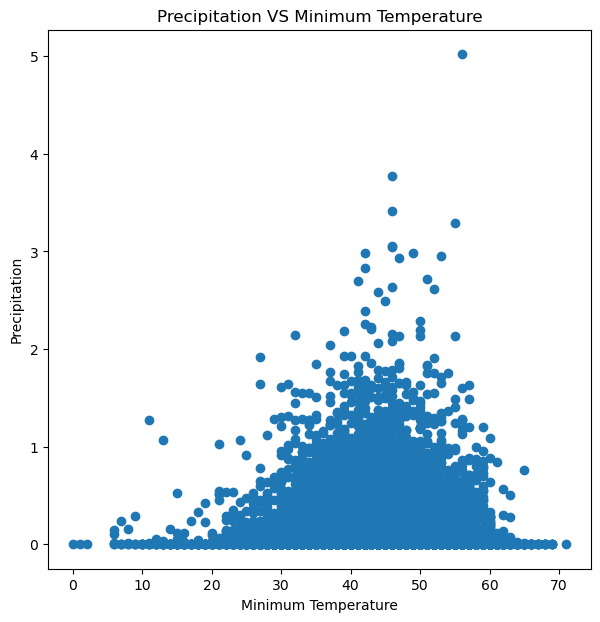

In [16]:
#  Plot graph to determine the correlation between Precipitation and Minimum Temperature
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN', y='PRCP', data=data)
plt.title('Precipitation VS Minimum Temperature')
plt.xlabel('Minimum Temperature')
plt.ylabel('Precipitation')
plt.show()

The graph shows that when the minimum temperature is between 30 and 60 degrees, the amount of precipitation increases

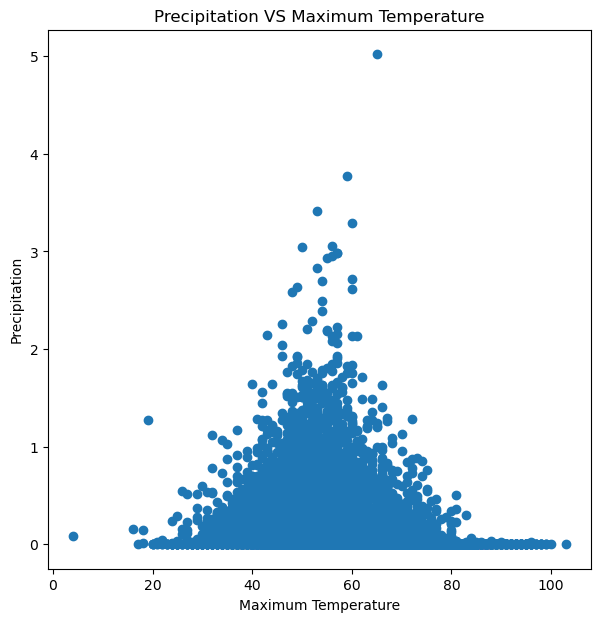

In [17]:
# Plot graph to determine the correlation between Precipitation and Maximum Temperature
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX', y='PRCP', data=data)
plt.title('Precipitation VS Maximum Temperature')
plt.xlabel('Maximum Temperature')
plt.ylabel('Precipitation')
plt.show()

The graph shows that when the maximum temperature is between 40 and 80 degrees, the amount of precipitation increases.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7212\3210799292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TMIN'])
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TMIN', ylabel='Density'>

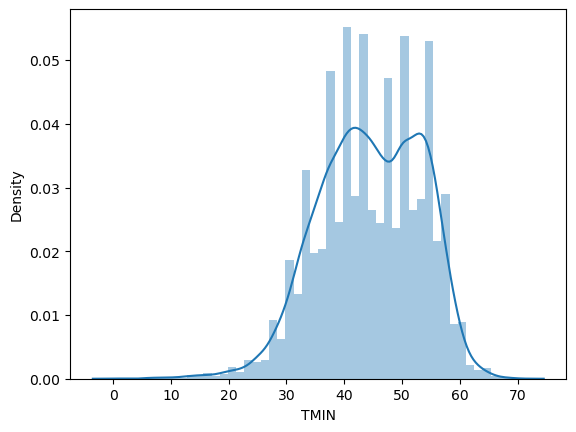

In [18]:
#  Plot graph to determine the overall distribution of minimum temperature
sns.distplot(data['TMIN'])

 The graph shows increasing density when the minimum temperature is between 30 to 60 degrees.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7212\1664688688.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TMAX'])
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TMAX', ylabel='Density'>

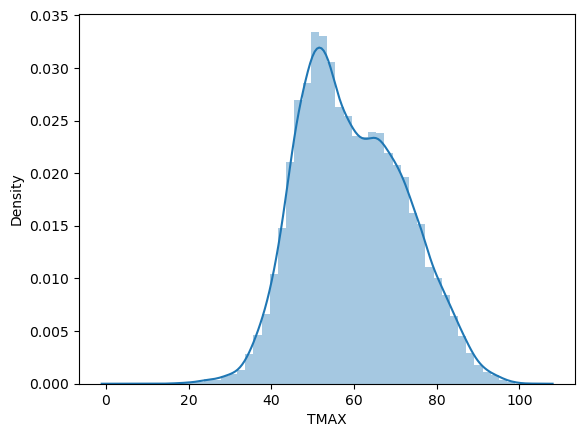

In [19]:
#  Plot graph to determine the overall distribution of maximum temperature
sns.distplot(data['TMAX'])

The graph shows increasing density when the maximum temperature is between 40 to 60 degrees.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


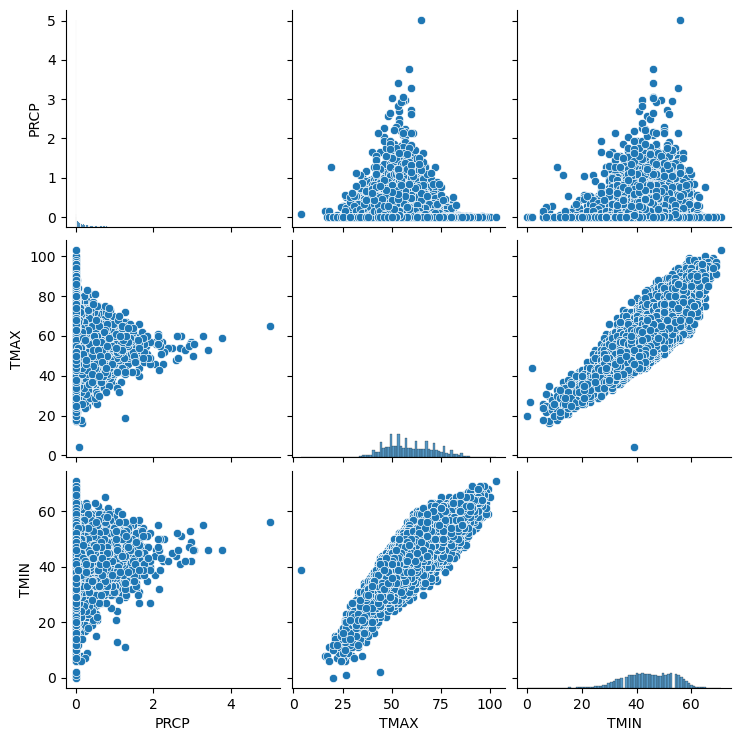

In [20]:
#  Plot graph to determine pairwise relationship between precipitation, maximum temperature, and minimum temperature
sns.pairplot(data=data)

 The graph shows relationship between amount of precipitation, maximum, and minimum temperature.

<Axes: >

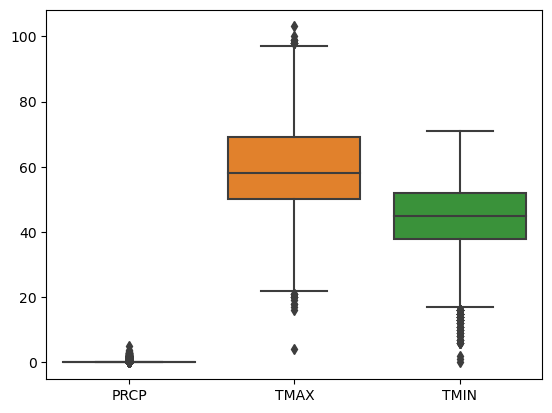

In [21]:
# Plot graph to determine the outliers in precipitation, maximum temperature, and minimum temperature
sns.boxplot(data=data)

### Outlier treatment

In [22]:
# Dropping the outliers from TMIN column 
data=data.drop(data[data['TMIN']<17].index)

In [23]:
# Dropping the outliers from TMAX columns i.e. the value more than 100 
data=data.drop(data[(data['TMAX']>97.5) | (data['TMAX']<21.5)].index)

In [24]:
# Dropping the outliers from PRCP columns i.e. the value more than 0.275 
data=data.drop(data[(data['PRCP']>0.25) | (data['PRCP']<-0.15)].index)

<Axes: >

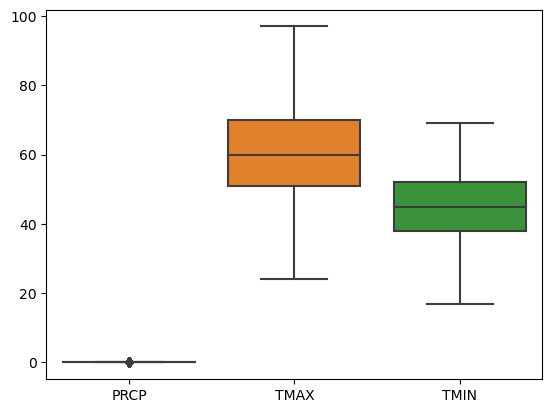

In [25]:
#  check whether the outliers are removed or not
sns.boxplot(data=data)

### Importing Logistic Regression Model

In [26]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
# Importing "train_test-split" function to test the model 
from sklearn.model_selection import train_test_split

In [29]:
x=data.drop(['RAIN', 'DATE'], axis=1)
y=data['RAIN']
y=y.astype('str')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

In [30]:
# Fit the model in train and test data
lr.fit(x_train, y_train).score(x_train, y_train)

0.9151712887438825

The accuracy score is 91%. It means the model is predicting fairly well.

In [31]:
# Now fitting the model in test set 
prediction=lr.predict(x_test)

In [32]:
# Printing first 5 rows after fitting the model in test set 
x_test.head()

,PRCP,TMAX,TMIN
20946,0.00,61,48
9133,0.00,41,36
23778,0.04,51,43
16200,0.01,53,45
23574,0.00,71,59
